# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### План работы
1. Открытие файла с данными и его изучение.
2. Разделение исходных данных на обучающую, валидационную и тестовую выборки.
3. Исследование качества разных моделей.
4. Проверка качества моделей на тестовой выборке.

## 1. Открытие и изучение файла

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB



,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0



0    2229
1     985
Name: is_ultra, dtype: int64


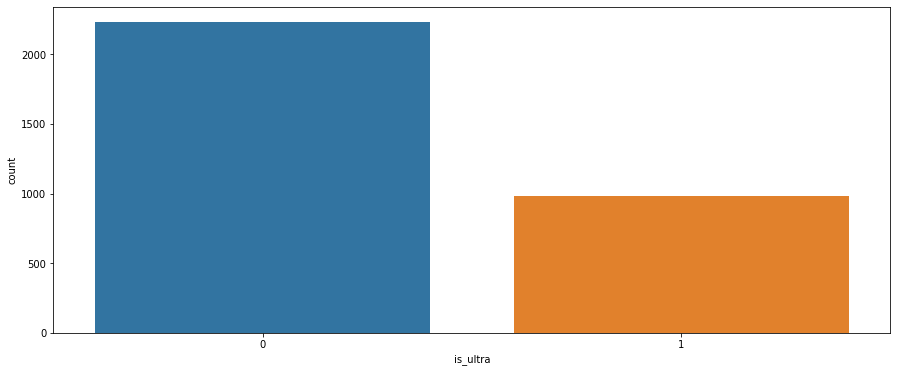

In [1]:
import pandas as pd #Импрортирую библиотеку Pandas
%matplotlib inline
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import seaborn as sns #Импортирую библиотеку seaborn
#Открываю датасет
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
print()
display(df.head(10))
print()
#Определяю количество пользователей обейх тарифов
print(df['is_ultra'].value_counts())

#Для наглядности строю график
plt.figure(figsize=(15, 6))
sns.countplot(x='is_ultra', data=df)

Дополнительно для предварительного анализа построим графики по количеству звонков, расходу минут, SMS и бегабайтов для обеих тарифов. Поскольку количество абонентов на тарифах "Смарт" и "Ультра" различаются более чем в 2 раза, воспользуемся средними показателями.

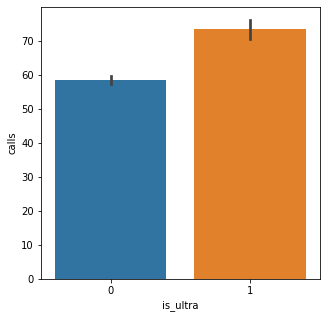

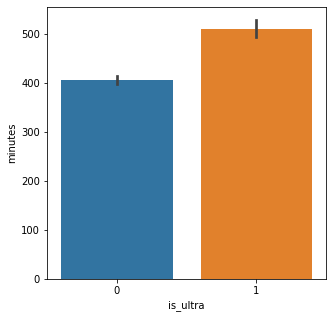

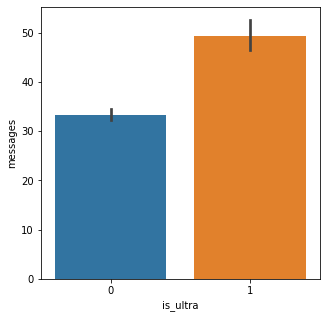

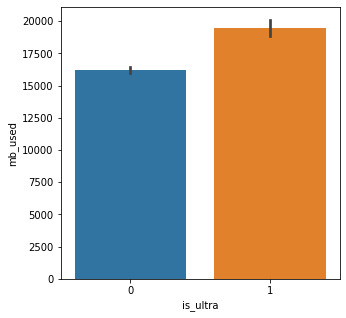

In [2]:
columns = [x for x in df.columns] #Создаю список из названия столбцов
columns.pop(-1) #Удаляю последний элемент

for column in columns: #Циклом строю графики
    plt.figure(figsize=(5, 5))
    sns.barplot(x='is_ultra', y=column, data=df)

### Вывод к Шагу 1

Для построения модели рекомендации тарифов предоставлен датасет, состоящий из 5 столбцов с данными и 3214 строк. Пропуски данных отсутствуют, датасет полностью подготовлен для построения модели.

<br>Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
<br>•	calls — количество звонков
<br>•	minutes — суммарная длительность звонков в минутах
<br>•	messages — количество sms-сообщений
<br>•	mb_used — израсходованный интернет-трафик (в мегабайтах)
<br>•	is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Из построенных графиков мы можем увидеть, что пользователей тарифа "Смарт" больше, чем пользователей тарифа "Ультра". Средние показатели по звонкам, расходу минут, SMS и мегабайтов у пользователей тарифа "Ультра" выше. Эти показатели наглядно характеризуют среднестатистического абонента по тарифам.

## 2. Разбейте данные на выборки

Прежде чем исследовать качество разных моделей, их необходимо разделить на выборки - обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбиваем в соотношении 3:1:1.

In [3]:
from sklearn.model_selection import train_test_split #Импортирую функцию train_test_split из библиотеки sklearn

df_train, df_test_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df_test_valid, test_size=0.5, random_state=12345)

print('Обучающая выборка:',df_train.shape)
display(df_train.head(10))
print()
print('Тестовая выборка:',df_test.shape)
display(df_test.head(10))
print()
print('Валидационная выборка:',df_valid.shape)
display(df_valid.head(10))

Обучающая выборка: (1928, 5)


,calls,minutes,messages,mb_used,is_ultra
3027,60.0,431.56,26.0,14751.26,0
434,33.0,265.17,59.0,17398.02,0
1226,52.0,341.83,68.0,15462.38,0
1054,42.0,226.18,21.0,13243.48,0
1842,30.0,198.42,0.0,8189.53,0
2142,68.0,403.58,28.0,19210.63,0
214,48.0,346.19,103.0,27346.62,1
1040,0.0,0.00,29.0,21289.28,1
2925,87.0,500.78,63.0,26115.19,0
943,31.0,269.94,48.0,13340.59,0



Тестовая выборка: (643, 5)


,calls,minutes,messages,mb_used,is_ultra
1386,92.0,536.96,18.0,20193.90,0
3124,40.0,286.57,17.0,17918.75,0
1956,81.0,531.22,56.0,17755.06,0
2286,67.0,460.76,27.0,16626.26,0
3077,22.0,120.09,16.0,9039.57,0
865,122.0,837.76,1.0,20197.07,1
604,10.0,96.29,20.0,3184.72,1
2215,62.0,436.68,52.0,12311.24,0
2745,50.0,350.72,29.0,29301.67,1
1094,0.0,0.00,35.0,17322.59,0



Валидационная выборка: (643, 5)


,calls,minutes,messages,mb_used,is_ultra
160,61.0,495.11,8.0,10891.23,0
2498,80.0,555.04,28.0,28083.58,0
1748,87.0,697.23,0.0,8335.70,0
1816,41.0,275.80,9.0,10032.39,0
1077,60.0,428.49,20.0,29389.52,1
791,11.0,58.54,5.0,7085.97,1
1024,100.0,709.40,17.0,16964.33,0
404,30.0,169.02,13.0,16626.53,0
1723,63.0,377.43,0.0,16663.48,0
153,72.0,457.21,0.0,13976.58,0


### Вывод к Шагу 2

Для обучения и исследования моделей исходный датасет разделен на 3 выборки **обучающую, валидационную и тестовую** в соотношении 3:1:1. Обучающая выборка содержит **1928 строки**, валидационная и тестовая по **643 строки**. 

## 3. Исследование моделей

Для построения и исследования моделей для задачи классификации будут использованы - **Решающее дерево, Случайный лес и Логистическая регрессия**.
<br>Для решения этой задачи необходимо определить *признаки (features)* по которым будут обучаться модели и *целевой признак (target)*, который нужно предсказать. Эти подготовительные шаги нужно выполнить для обучающей и валидационной выборок.

In [4]:
#Определяю признаки и целевой признак
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

#Проверяю готовность признаков
print('Тестовые признаки')
train_features.info()
display(train_target.head(10))
print('Валидационные признаки')
valid_features.info()
display(valid_target.head(10))

Тестовые признаки
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 4 columns):
calls       1928 non-null float64
minutes     1928 non-null float64
messages    1928 non-null float64
mb_used     1928 non-null float64
dtypes: float64(4)
memory usage: 75.3 KB


3027    0
434     0
1226    0
1054    0
1842    0
2142    0
214     1
1040    1
2925    0
943     0
Name: is_ultra, dtype: int64

Валидационные признаки
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 4 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
dtypes: float64(4)
memory usage: 25.1 KB


160     0
2498    0
1748    0
1816    0
1077    1
791     1
1024    0
404     0
1723    0
153     0
Name: is_ultra, dtype: int64

#### Модель на основе Решающего дерева

In [5]:
from sklearn.metrics import accuracy_score #Импортирую метрику accuracy_score из библиотеки sklearn
from sklearn.tree import DecisionTreeClassifier #Импортирую DecisionTreeClassifier из библиотеки sklearn
tree_accuracy_list = [] #Создаю пустой список для сбора данных по точности модели
tree_depth_list = [] #Создаю пустой список настроек гиперпараметра max_depth
tree_split_list = [] #Создаю пустой список настроек гиперпараметра min_samples_split
tree_leaf_list = [] #Создаю пустой список настроек гиперпараметра min_samples_leaf

#Циклом обучаю модель решающего дерева при разных значениях max_depth, min_samples_split, min_samples_leaf
#и проверяю показатель точности (accuracy)
for depth in range(2, 14, 2):
    for split in range(2, 6):
        for leaf in range(1, 5):
            tree_model = DecisionTreeClassifier(random_state=12345, 
                                                max_depth=depth, 
                                                min_samples_split=split, 
                                                min_samples_leaf=leaf)
            tree_model.fit(train_features, train_target)
            tree_predictions = tree_model.predict(valid_features)
            tree_accuracy = accuracy_score(valid_target, tree_predictions)
            tree_accuracy_list.append(tree_accuracy)
            tree_depth_list.append(depth)
            tree_split_list.append(split)
            tree_leaf_list.append(leaf)
            print('Для Дерева решений max_depth =', depth, 
                  'min_samples_split =',split,
                  'min_samples_leaf =',leaf,
                  'accuracy =', tree_accuracy)

index = tree_accuracy_list.index(max(tree_accuracy_list))
optimal_depth = tree_depth_list[index]
optimal_split = tree_split_list[index]
optimal_leaf = tree_leaf_list[index]
print()
print('Максимальная точность модели Дерево решений равна:', max(tree_accuracy_list))
print('Оптимальное значение max_depth равно:', optimal_depth)
print('Оптимальное значение min_samples_split равно:', optimal_split)
print('Оптимальное значение min_samples_leaf равно:', optimal_leaf)

Для Дерева решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 1 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 2 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 3 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 4 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 1 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 2 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 3 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 4 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_split = 4 min_samples_leaf = 1 accuracy = 0.7744945567651633
Для Дерева решений max_depth = 2 min_samples_s

#### Вывод по модели Решающего дерева
Точность модели растет до глубины равной 8, минимального количества выборок для разделения узла равного 2 и минимального количества выборок для разделения листьев равного 3. Затем точность начинает постепено снижаться, что говорит о переобучении модели. Следовательно необходимо остановиться на модели со значением гиперпараметров **max_depth=8, min_samples_split=2, min_samples_leaf=3**. Максимальная точность модели Дерево решений равна: 0.801.

#### Модель на основе Случайного леса

In [6]:
from sklearn.ensemble import RandomForestClassifier #Импортирую RandomForestClassifier из библиотеки sklearn
#Циклом обучаю модель решающего дерева при разных значениях max_depth и проверяю показатель точности (accuracy)
forest_accuracy_list = []#Создаю пустой список для сбора данных по точности модели
forest_estimators_list = [x for x in range(2, 60, 2)]
for estim in range(2, 60, 2):
    forest_model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    forest_model.fit(train_features, train_target)
    forest_predictions = forest_model.predict(valid_features)
    forest_accuracy = accuracy_score(valid_target, forest_predictions)
    forest_accuracy_list.append(forest_accuracy)
    print('Для Случайного леса при n_estimators =', estim, ', accuracy =', forest_accuracy)
#Нахожу оптимальное значение n_estimators
optimal_estimator = forest_estimators_list[forest_accuracy_list.index(max(forest_accuracy_list))]
print()
print('Максимальная точность модели Случайный лес равна:', max(forest_accuracy_list))

Для Случайного леса при n_estimators = 2 , accuracy = 0.7589424572317263
Для Случайного леса при n_estimators = 4 , accuracy = 0.7729393468118196
Для Случайного леса при n_estimators = 6 , accuracy = 0.7791601866251944
Для Случайного леса при n_estimators = 8 , accuracy = 0.7869362363919129
Для Случайного леса при n_estimators = 10 , accuracy = 0.7807153965785381
Для Случайного леса при n_estimators = 12 , accuracy = 0.7869362363919129
Для Случайного леса при n_estimators = 14 , accuracy = 0.7807153965785381
Для Случайного леса при n_estimators = 16 , accuracy = 0.7838258164852255
Для Случайного леса при n_estimators = 18 , accuracy = 0.7853810264385692
Для Случайного леса при n_estimators = 20 , accuracy = 0.7822706065318819
Для Случайного леса при n_estimators = 22 , accuracy = 0.7807153965785381
Для Случайного леса при n_estimators = 24 , accuracy = 0.7822706065318819
Для Случайного леса при n_estimators = 26 , accuracy = 0.7838258164852255
Для Случайного леса при n_estimators = 28 

#### Вывод по модели Случайного леса
Точность модели растет до количества деревьев равного 48. Затем точность начинает постепено снижаться, что говорит о переобучении модели. Следовательно необходимо остановиться на модели со значением гиперпараметра **n_estimators = 48**. Максимальная точность модели Случайный лес равна: 0.796. Дополнительным важным фактором является то, что модель *Случайного леса* обучается дольше, чем модель *Дерева решений*, что может сказаться на скорости работы сервиса.

#### Модель на основе Логистической регрессии

In [7]:
from sklearn.linear_model import LogisticRegression #Импортирую LogisticRegression из библиотеки sklearn

logistic_model = LogisticRegression(random_state=12345)
logistic_model.fit(train_features, train_target) #Обучаю модель

logistic_predictions = logistic_model.predict(valid_features)
logistic_model_accuracy = accuracy_score(valid_target, logistic_predictions)
print('Для Логистической регресии accuracy =', logistic_model_accuracy)

Для Логистической регресии accuracy = 0.7402799377916018


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Вывод по модели Логистической регрессии
Точность модели растет Логистической регрессии имеет показатель равный 0.740, что является самым низким, среди всех остальных показателей, тем не менее, в следующем шаге эта модель также будет проверена на тестовой выборке.

### Вывод к Шагу 3

На этом шаге было проведено исследование трех типов моделей - **Решающее дерево, Случайный лес и Логистическая регрессия**. Наибольшей точности при настройке гиперпараметров удалось достичь у модели **Решающее дерево**, наименьшей у **Логистической регрессии**. При определенных настройках гиперпараметров наблюдалось переобучение моделей. Исследование позволило выявить оптимальные настройки, которые будут использованы для проверки моделей на тестовой выборке. 

## 4. Проверка моделей на тестовой выборке

Предварительно выделяем признаки для работы модели у тестовой выборки, в том числе целевой. 

In [8]:
test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']

In [11]:
train_valid_df = df_train.merge(df_valid, how='outer')
display(train_valid_df)

,calls,minutes,messages,mb_used,is_ultra
0,60.0,431.56,26.0,14751.26,0
1,33.0,265.17,59.0,17398.02,0
2,52.0,341.83,68.0,15462.38,0
3,42.0,226.18,21.0,13243.48,0
4,30.0,198.42,0.0,8189.53,0
...,...,...,...,...,...
2566,55.0,446.06,79.0,26526.28,0
2567,102.0,742.65,58.0,16089.24,1
2568,52.0,349.94,42.0,12150.72,0
2569,39.0,221.18,59.0,17865.23,0


Для осущетвления проверок моделей на тестовой выборке выбираю настройки гиперпараметров для моделей согласно выводам из шага 3.

In [9]:
#Проверяю модель Дерево решений на тестовой выборке
tree_model = DecisionTreeClassifier(random_state=12345, 
                                    max_depth = optimal_depth, 
                                    min_samples_split = optimal_split, 
                                    min_samples_leaf = optimal_leaf)
tree_model.fit(train_features, train_target)
tree_predictions = tree_model.predict(test_features)
tree_accuracy = accuracy_score(test_target, tree_predictions)
print('Для модели Дерева решений при max_depth =', optimal_depth, 
      ', min_samples_split =', optimal_split,
      ', min_samples_leaf =', optimal_leaf, 
      'accuracy =', tree_accuracy)

Для модели Дерева решений при max_depth = 8 , min_samples_split = 2 , min_samples_leaf = 3 accuracy = 0.7682737169517885


In [10]:
#Проверяю модель Случайный лес на тестовой выборке
forest_model = RandomForestClassifier(random_state=12345, n_estimators=optimal_estimator)
forest_model.fit(train_features, train_target)
forest_predictions = forest_model.predict(test_features)
forest_accuracy = accuracy_score(test_target, forest_predictions)
print('Для модели Случайного леса при n_estimators =', optimal_estimator,', accuracy =', forest_accuracy)

Для модели Случайного леса при n_estimators = 48 , accuracy = 0.7916018662519441


In [11]:
#Проверяю модель Логистической регрессии на тестовой выборке
logistic_model = LogisticRegression(random_state=12345)
logistic_model.fit(train_features, train_target) #Обучаю модель

logistic_predictions = logistic_model.predict(valid_features)
logistic_model_accuracy = accuracy_score(test_target, logistic_predictions)
print('Для Логистической регресии accuracy =', logistic_model_accuracy)

Для Логистической регресии accuracy = 0.687402799377916


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Вывод к Шагу 4

Проверка моделей на тестовой выборке показала инетересный факт - точность модели **Случайного леса** оказалась заметно выше чем точность модели **Решающего дерева**. Точность обеих моделей превысила значение 0.75, следовательно их можно использовать для определения подходящего тарифа. Модель **Логистическй регрессии** для этой задачи использовать не рекомендуется.

## 5. Проверка модели на адекватность

In [12]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Пусть наша константная модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 79%. Можем заключить, что проверка на адекватность пройдена успешно.

## Общий вывод

В рамках проекта был получен датасет содержащий информацию о месячном использовании минут, SMS и мегабайтов абонентами мобильного оператора "Мегалайн".
<br>Датасет состоит из 5 столбцов и 3214 строк. Пропуски данных отсутствуют, датасет полностью подготовлен для построения модели по определению подходящего тарифа для абонентов, которые на сегодняшний день пользуются архивными тарифами.

<br>Для обучения моделей исходный датасет был разделен на три выборки **обучающую, валидационную и тестовоую** в соотношении 3:1:1.

Для построения и исследования моделей для задачи классификации будут использованы - **Решающее дерево, Случайный лес и Логистическая регрессия**.
<br>Перед обучением моделей определены *признаки (features)* по которым будут обучаться модели и *целевой признак (target)*, который нужно предсказать. Эти подготовительные шаги выполнены для всех выборок.

Обученные модели проверены на точность при различных настройках гиперпараметров. Наименьшую точность на валидационной выборке показала модель **Логистической регрессии** она равна 0.740. **Решающее дерево** и **Случайный лес** на оптимальных параметрах показали точности 0.801 и 0.796 соответственно.

Проверка на тестовой выборке ваявила наибольшую точность у модели **Случайный лес** равную 0.791, именно эту модель рекомендуется использовать для подбора оптимального тарифа.